In [2]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [3]:
#Set Psudeorandom Seed
seed = 42

In [4]:
#Uploading the first dataset
file = 'C:/Users/Brandon/Documents/thesis/data/3a_offset.xlsx'
df = pd.read_excel (file,index_col=0,na_values=['..'])
print('file uploaded')

file uploaded


In [5]:
#Create testing and training sets
array = df.values

#Create X array
X= array[:,4:45]

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Create Y array
Y= array[:,3]
Y=Y.astype('int')

#Training/Test Split
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
print('Train/Test Split Complete')

Train/Test Split Complete


In [6]:
#Impliment SMOTE
sm = SMOTE(random_state = 2) 
X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)

print('oversampling complete')

oversampling complete


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [7]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_smote, Y_train_smote)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.8841832324978393
[[767  90]
 [ 44 256]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       857
           1       0.74      0.85      0.79       300

    accuracy                           0.88      1157
   macro avg       0.84      0.87      0.86      1157
weighted avg       0.89      0.88      0.89      1157



In [8]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8928262748487468
[[812  45]
 [ 79 221]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       857
           1       0.83      0.74      0.78       300

    accuracy                           0.89      1157
   macro avg       0.87      0.84      0.85      1157
weighted avg       0.89      0.89      0.89      1157



In [9]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9006050129645635
[[807  50]
 [ 65 235]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       857
           1       0.82      0.78      0.80       300

    accuracy                           0.90      1157
   macro avg       0.88      0.86      0.87      1157
weighted avg       0.90      0.90      0.90      1157



In [10]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8738115816767502
[[773  84]
 [ 62 238]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       857
           1       0.74      0.79      0.77       300

    accuracy                           0.87      1157
   macro avg       0.83      0.85      0.84      1157
weighted avg       0.88      0.87      0.88      1157



In [11]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.881590319792567
[[838  19]
 [118 182]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       857
           1       0.91      0.61      0.73       300

    accuracy                           0.88      1157
   macro avg       0.89      0.79      0.83      1157
weighted avg       0.88      0.88      0.87      1157



In [12]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9066551426101987
[[818  39]
 [ 69 231]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       857
           1       0.86      0.77      0.81       300

    accuracy                           0.91      1157
   macro avg       0.89      0.86      0.87      1157
weighted avg       0.90      0.91      0.91      1157



In [13]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8176318063958513
[[705 152]
 [ 59 241]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       857
           1       0.61      0.80      0.70       300

    accuracy                           0.82      1157
   macro avg       0.77      0.81      0.78      1157
weighted avg       0.84      0.82      0.82      1157



In [14]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9066551426101987
[[820  37]
 [ 71 229]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       857
           1       0.86      0.76      0.81       300

    accuracy                           0.91      1157
   macro avg       0.89      0.86      0.87      1157
weighted avg       0.90      0.91      0.90      1157



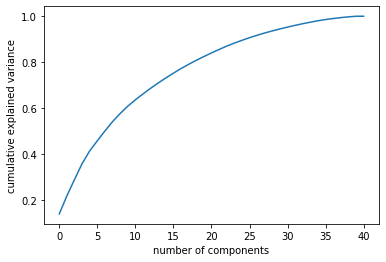

In [15]:
pca = PCA().fit(X_train_smote)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [16]:
pca = PCA(.8)
principalComponents = pca.fit_transform(X_train_smote)

In [17]:
pca.n_components_

19

In [18]:
pca.explained_variance_ratio_

array([0.13905586, 0.07889579, 0.07100771, 0.06931912, 0.05547949,
       0.04399396, 0.04254836, 0.04078961, 0.0351217 , 0.03201645,
       0.02789561, 0.02551307, 0.02464475, 0.02313469, 0.02176062,
       0.02083043, 0.02021765, 0.01826046, 0.01753331])

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.13905586, 0.21795165, 0.28895936, 0.35827847, 0.41375796,
       0.45775193, 0.50030028, 0.54108989, 0.57621159, 0.60822804,
       0.63612365, 0.66163672, 0.68628147, 0.70941616, 0.73117678,
       0.75200721, 0.77222486, 0.79048532, 0.80801863])

In [20]:
X_train_pca = pca.transform(X_train_smote)
X_validation_pca = pca.transform(X_validation)

In [21]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8772687986171133
[[766  91]
 [ 51 249]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       857
           1       0.73      0.83      0.78       300

    accuracy                           0.88      1157
   macro avg       0.83      0.86      0.85      1157
weighted avg       0.88      0.88      0.88      1157



In [22]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8409680207433017
[[728 129]
 [ 55 245]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       857
           1       0.66      0.82      0.73       300

    accuracy                           0.84      1157
   macro avg       0.79      0.83      0.81      1157
weighted avg       0.86      0.84      0.85      1157



In [23]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8910976663785652
[[762  95]
 [ 31 269]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       857
           1       0.74      0.90      0.81       300

    accuracy                           0.89      1157
   macro avg       0.85      0.89      0.87      1157
weighted avg       0.90      0.89      0.89      1157



In [24]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8617113223854796
[[764  93]
 [ 67 233]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       857
           1       0.71      0.78      0.74       300

    accuracy                           0.86      1157
   macro avg       0.82      0.83      0.82      1157
weighted avg       0.87      0.86      0.86      1157



In [25]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.756266205704408
[[620 237]
 [ 45 255]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       857
           1       0.52      0.85      0.64       300

    accuracy                           0.76      1157
   macro avg       0.73      0.79      0.73      1157
weighted avg       0.82      0.76      0.77      1157



In [26]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7657735522904062
[[623 234]
 [ 37 263]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       857
           1       0.53      0.88      0.66       300

    accuracy                           0.77      1157
   macro avg       0.74      0.80      0.74      1157
weighted avg       0.84      0.77      0.78      1157



In [27]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7821953327571305
[[711 146]
 [106 194]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       857
           1       0.57      0.65      0.61       300

    accuracy                           0.78      1157
   macro avg       0.72      0.74      0.73      1157
weighted avg       0.79      0.78      0.79      1157



In [28]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9006050129645635
[[778  79]
 [ 36 264]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       857
           1       0.77      0.88      0.82       300

    accuracy                           0.90      1157
   macro avg       0.86      0.89      0.88      1157
weighted avg       0.91      0.90      0.90      1157

